##Chapter 4. More Plots and Customizations

#####목차
- Setting the transparency and size of axis labels
- Adding a shadow to the chart line
- Adding a data table to the figure
- Using subplots
- Customizing grids
- Creating contour plots
- Filling an under-plot area
- Drawing polar plots
- Visualizing the filesytem tree using a polar bar

###4.1 Setting the transparency and size of axis labels

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np

In [2]:
# 평균 0 표준편차 1인 정규분포에서 표본 추출
data = np.random.randn(70)
data

array([  7.19870297e-01,  -5.30317852e-01,   1.33727482e-01,
         8.37714343e-01,  -1.16131174e+00,   3.52416258e-01,
        -1.86528558e-01,   1.32016072e+00,  -8.20636437e-01,
        -7.93217398e-01,   1.99679332e-01,   7.36945778e-01,
         3.65390933e-01,   3.88743602e-01,  -6.15739126e-01,
        -5.07739791e-01,   2.06928858e+00,  -6.01084231e-02,
         4.40549920e-01,  -3.63496653e-01,  -4.29953975e-02,
         4.14692404e-01,   6.37557265e-01,  -1.10996250e-01,
        -3.75989419e-01,  -8.47907948e-01,   5.57685926e-01,
        -4.64247448e-01,   6.38312732e-01,   6.61784189e-01,
         9.17270205e-01,   1.45088742e+00,  -3.33816899e-01,
        -6.75347844e-01,   1.60735322e+00,   2.23075238e+00,
         3.89585420e-01,  -1.77281391e+00,  -2.11358637e-03,
        -3.35393214e-01,  -4.73771389e-02,  -1.29778779e+00,
        -1.22561236e+00,  -6.83102839e-01,  -1.77325798e+00,
        -1.77878452e+00,  -4.92717754e-01,  -1.37097086e-01,
         1.41261956e+00,

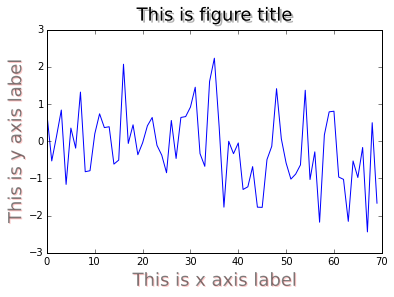

In [3]:
fontsize = 18
plt.plot(data)

title = "This is figure title"
x_label = "This is x axis label"
y_label = "This is y axis label"

title_text_obj = plt.title(title, fontsize=fontsize, verticalalignment='bottom')

title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

# offset_xy -- set the 'angle' of the shadow
# shadow_rgbFace -- set the color of the shadow
# patch_alpha -- setup the transparaency of the shadow
offset_xy = (1, -1)
rgbRed = (1.0,0.0,0.0)
alpha = 0.8

# customize shadow properties
pe = patheffects.withSimplePatchShadow(offset_xy = offset_xy,
                                       shadow_rgbFace = rgbRed,
                                       patch_alpha = alpha)

# apply them to the xaxis and yaxis labels
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=.5)
xlabel_obj.set_path_effects([pe])

ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.show()

###4.2 Adding a shadow to the chart line

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [5]:
def setup(layout=None):
    assert layout is not None

    fig = plt.figure()
    ax = fig.add_subplot(layout)
    return fig, ax

In [6]:
def get_signal():
    t = np.arange(0., 2.5, 0.01)
    s = np.sin(5 * np.pi * t)
    return t, s

In [7]:
def plot_signal(t, s):
    line, = axes.plot(t, s, linewidth=5, color='magenta')
    return line,
# line, 의 의미를 모르겠음

In [8]:
def make_shadow(fig, axes, line, t, s):
    delta = 2 / 72.  # how many points to move the shadow
    offset = transforms.ScaledTranslation(delta, -delta, fig.dpi_scale_trans)
    offset_transform = axes.transData + offset

    # We plot the same data, but now using offset transform
    # zorder -- to render it below the line
    axes.plot(t, s, linewidth=5, color='gray',
              transform=offset_transform,
              zorder=0.5 * line.get_zorder())

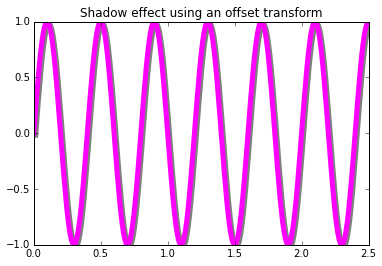

In [9]:
if __name__ == "__main__":
    fig, axes = setup(111)
    t, s = get_signal()
    line, = plot_signal(t, s)

    make_shadow(fig, axes, line, t, s)

    axes.set_title('Shadow effect using an offset transform')
    plt.show()

###4.3 Customizing grids

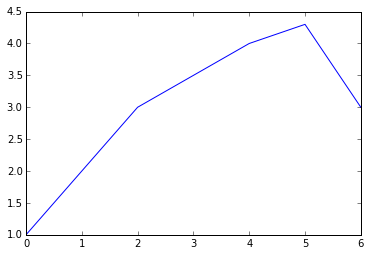

In [10]:
plt.plot([1,2,3,3.5,4,4.3,3])

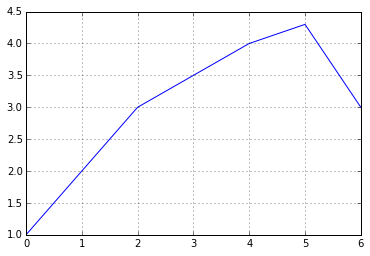

In [11]:
plt.grid()
plt.plot([1,2,3,3.5,4,4.3,3])

###4.4 Adding a data table to the figure

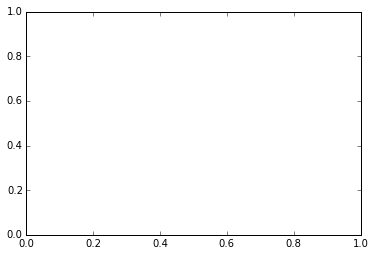

In [12]:
import matplotlib.pylab as plt
import numpy as np

plt.figure()
axes=plt.gca()
y= np.random.randn(9)

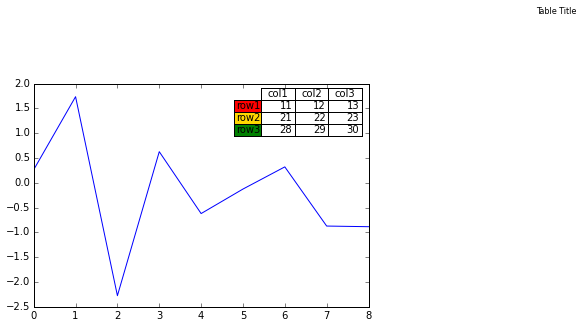

In [13]:
col_labels=['col1','col2','col3']
row_labels=['row1','row2','row3']
table_vals=[[11,12,13],[21,22,23],[28,29,30]]
row_colors=['red','gold','green']

the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1]*3,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  rowColours=row_colors,
                  loc='upper right')

plt.text(12,3.4,'Table Title',size=8)

plt.plot(y)
plt.show()

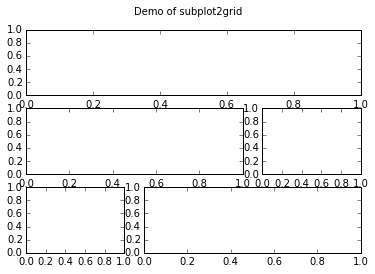

In [14]:
import matplotlib.pyplot as plt

plt.figure(0)
axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
axes3 = plt.subplot2grid((3, 3), (1, 2))
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=2)

# tidy up tick labels size
all_axes = plt.gcf().axes
for ax in all_axes:
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(10)

plt.suptitle("Demo of subplot2grid")
plt.show()

###4.5 Customizing grids

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.cbook import get_sample_data

/Users/Sung/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module PIL was already imported from /Users/Sung/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/PIL/__init__.pyc, but /Users/Sung/anaconda/lib/python2.7/site-packages is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [16]:
def get_demo_image():
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    # z is a numpy array of 15x15
    Z = np.load(f)
    return Z, (-3, 4, -4, 3)

In [17]:
def get_grid(fig=None, layout=None, nrows_ncols=None):
    assert fig is not None
    assert layout is not None
    assert nrows_ncols is not None

    grid = ImageGrid(fig, layout, nrows_ncols=nrows_ncols,
                    axes_pad=0.05, add_all=True, label_mode="L")
    return grid

In [18]:
def load_images_to_grid(grid, Z, *images):
    min, max = Z.min(), Z.max()
    for i, image in enumerate(images):
        axes = grid[i]
        axes.imshow(image, origin="lower", vmin=min, vmax=max,
                  interpolation="nearest")

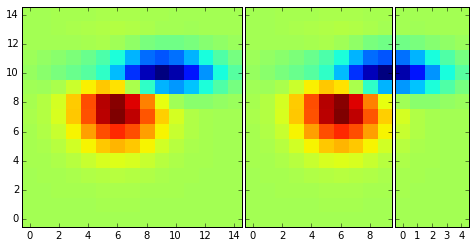

In [19]:
if __name__ == "__main__":
    fig = plt.figure(1, (8, 6))
    grid = get_grid(fig, 111, (1, 3))
    Z, extent = get_demo_image()

    # Slice image
    image1 = Z
    image2 = Z[:, :10]
    image3 = Z[:, 10:]

    load_images_to_grid(grid, Z, image1, image2, image3)

    plt.draw()
    plt.show()

###4.6 Creating contour plots

In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
def process_signals(x, y):
    return (1 - (x ** 2 + y ** 2)) * np.exp(-y ** 3 / 3)

x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)

# Make grids of points
X, Y = np.meshgrid(x, y)

Z = process_signals(X, Y)

# Number of isolines
N = np.arange(-1, 1.5, 0.3)

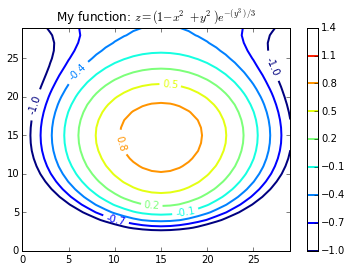

In [22]:
# adding the Contour lines with labels
CS = plt.contour(Z, N, linewidths=2, cmap=mpl.cm.jet)
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(CS)

plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

###4.7 Filling an under-plot area

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

t = range(1000)
t[:5]

[0, 1, 2, 3, 4]

In [24]:
y = [sqrt(i) for i in t]
y[:5]

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0]

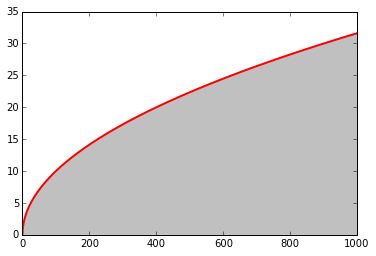

In [25]:
plt.plot(t, y, color = 'red', lw=2)
plt.fill_between(t, y, color='silver')
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi*x)
y2 = 1.7*np.sin(4*np.pi*x)

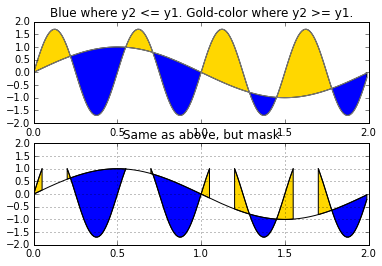

In [27]:
fig = plt.figure()
axes1 = fig.add_subplot(211)
axes1.plot(x, y1, x, y2, color='grey')
axes1.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes1.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes1.set_title('Blue where y2 <= y1. Gold-color where y2 >= y1.')
axes1.set_ylim(-2,2)

# Mask values in y2 with value greater than 1.0
y2 = np.ma.masked_greater(y2, 1.0)
axes2 = fig.add_subplot(212, sharex=axes1)
axes2.plot(x, y1, x, y2, color='black')
axes2.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes2.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes2.set_title('Same as above, but mask')
axes2.set_ylim(-2,2)
axes2.grid('on')

plt.show()

###4.8 Drawing polar plots

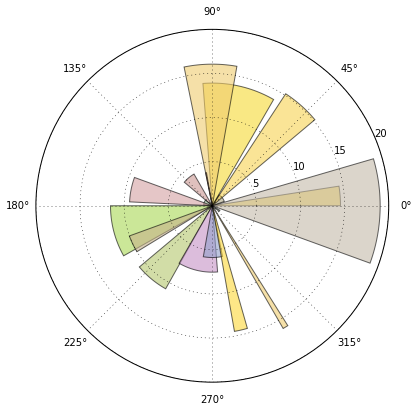

In [28]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

figsize = 7
colormap = lambda r: cm.Set2(r / 20.)
N = 18  # number of bars

fig = plt.figure(figsize=(figsize,figsize))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7], polar=True)

theta = np.arange(0.0, 2 * np.pi, 2 * np.pi/N)
radii = 20 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(colormap(r))
    bar.set_alpha(0.6)

plt.show()

###4.9 Visualizing the filesytem tree using a polar bar

In [29]:
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [30]:
def build_folders(start_path):
    folders = []

    for each in get_directories(start_path):
        size = get_size(each)
        if size >= 25 * 1024 * 1024:
            folders.append({'size': size, 'path': each})

    for each in folders:
        print "Path: " + os.path.basename(each['path'])
        print "Size: " + str(each['size'] / 1024 / 1024) + " MB"

    return folders

In [31]:
def get_size(path):
    assert path is not None

    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            try:
                size = os.path.getsize(fp)
                total_size += size
                #print "Size of '{0}' is {1}".format(fp, size)
            except OSError as err:
                print str(err)
                pass
    return total_size

In [32]:
def get_directories(path):
    dirs = set()
    for dirpath, dirnames, filenames in os.walk(path):
        dirs = set([os.path.join(dirpath, x) for x in dirnames])
        break  # we just want the first one
    return dirs

In [33]:
def draw(folders):
    """ Draw folder size for given folder"""
    figsize = (8, 8)  # keep the figure square
    ldo, rup = 0.1, 0.8  # left down, right up coordinates, normalized
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([ldo, ldo, rup, rup], polar=True)

    # transform data
    x = [os.path.basename(x['path']) for x in folders]
    y = [y['size'] / 1024 / 1024 for y in folders]
    theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / len(x))
    radii = y

    bars = ax.bar(theta, radii)
    middle = 90 / len(x)
    theta_ticks = [t * (180 / np.pi) + middle for t in theta]
    lines, labels = plt.thetagrids(theta_ticks, labels=x, frac=0.5)
    for step, each in enumerate(labels):
        each.set_rotation(theta[step] * (180 / np.pi) + middle)
        each.set_fontsize(8)

    # configure bars
    colormap = lambda r: cm.Set2(r / len(x))
    for r, each in zip(radii, bars):
        each.set_facecolor(colormap(r))
        each.set_alpha(0.5)

    plt.show()

In [34]:
if __name__ == '__main__':
    if len(sys.argv) is not 2:
        print "ERROR: Please supply path to folder."
        sys.exit(-1)

    start_path = sys.argv[1]

    if not os.path.exists(start_path):
        print "ERROR: Path must exits."
        sys.exit(-1)

    folders = build_folders(start_path)

    if len(folders) < 1:
        print "ERROR: Path does not contain any folders."
        sys.exit(-1)

    draw(folders)

ERROR: Please supply path to folder.


SystemExit: -1

To exit: use 'exit', 'quit', or Ctrl-D.
